<a href="https://colab.research.google.com/github/giacomoaccursi/Tirocinio/blob/main/train_on_frame.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!git clone https://github.com/giacomoaccursi/Tirocinio.git

Cloning into 'Tirocinio'...
remote: Enumerating objects: 16840, done.
remote: Counting objects: 100% (16840/16840), done.
remote: Compressing objects: 100% (16833/16833), done.
remote: Total 16840 (delta 5), reused 16829 (delta 4), pack-reused 0
Receiving objects: 100% (16840/16840), 7.03 MiB | 10.90 MiB/s, done.
Resolving deltas: 100% (5/5), done.


In [ ]:
import json
import numpy as np
import pandas as pd

In [ ]:
from os import listdir
from os.path import isfile, join
#lista tutti i file dato un percorso
def list_all_files(input_path):
  files = [join(input_path, f) for f in listdir(input_path) if isfile(join(input_path, f))]
  return list(zip(files, listdir(input_path)))

def list_all_in_dir(input_path):
  files = [join(input_path, f) for f in listdir(input_path)]
  return files

In [ ]:
#estrae i dati dal file json
def extract_json_detection(file):
  with open(file, 'r') as f:
    data = json.load(f)
    data = data["people"][0]["pose_keypoints_2d"]
  return data

In [ ]:
def coordinate_from_data(data): 
  del data[2:75:3] 
  new_data = [ [data[i], data[i+1]] for i in range(0, len(data), 2)]
  return new_data

In [ ]:
keypoints = np.arange(0, 25)
matrix = []

In [ ]:
outputs = sorted(list_all_in_dir("/content/Tirocinio/video_output"))
for output in outputs:
  print(output)
  files = sorted(list_all_files(output))
  for file in files: 
    data = coordinate_from_data(extract_json_detection(file[0]))
    matrix.append(data)



In [ ]:
labels = []
for output in outputs: 
  for file in sorted(list_all_files(output)):
    labels.append((file[1].split("_"))[2])

In [ ]:
matrix = np.array(matrix)
labels = np.array(labels)

In [ ]:
from tensorflow.keras.utils import to_categorical
labels = to_categorical(labels)

In [ ]:
from sklearn.model_selection import train_test_split

(X_train, X_test, y_train, y_test) = train_test_split(matrix, labels,
	test_size=0.25, stratify=labels, random_state=42)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv1D

model = Sequential([
                    Conv1D(16, 15, input_shape=(X_train.shape[1], X_train.shape[2])), 
                    Flatten(), 
                    Dense(128, activation = "relu"), 
                    Dense(128, activation = "relu"), 
                    Dense(128, activation = "relu"), 
                    Dense(y_train.shape[1], activation = "softmax")
])

In [ ]:
model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [ ]:
H = model.fit(X_train, y_train, epochs=100, batch_size=20,validation_data=(X_test, y_test) )

Epoch 1/100
642/642 [==============================] - 2s 3ms/step - loss: 3.8784 - accuracy: 0.6743 - val_loss: 0.3489 - val_accuracy: 0.8534
Epoch 2/100
642/642 [==============================] - 2s 2ms/step - loss: 0.3752 - accuracy: 0.8607 - val_loss: 0.3069 - val_accuracy: 0.8698
Epoch 3/100
642/642 [==============================] - 2s 2ms/step - loss: 0.2859 - accuracy: 0.8895 - val_loss: 0.2060 - val_accuracy: 0.9324
Epoch 4/100
642/642 [==============================] - 2s 2ms/step - loss: 0.2681 - accuracy: 0.8984 - val_loss: 0.2397 - val_accuracy: 0.9095
Epoch 5/100
642/642 [==============================] - 2s 2ms/step - loss: 0.2417 - accuracy: 0.9048 - val_loss: 0.1905 - val_accuracy: 0.9306
Epoch 6/100
642/642 [==============================] - 2s 2ms/step - loss: 0.2205 - accuracy: 0.9152 - val_loss: 0.3151 - val_accuracy: 0.8796
Epoch 7/100
642/642 [==============================] - 2s 2ms/step - loss: 0.2327 - accuracy: 0.9126 - val_loss: 0.1666 - val_accuracy: 0.9472

In [ ]:
model.evaluate(X_test, y_test)

134/134 [==============================] - 0s 1ms/step - loss: 0.1319 - accuracy: 0.9748


[0.13193227350711823, 0.9747545719146729]

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.reshape(-1, X_train.shape[-1])).reshape(X_train.shape)
X_test_scaled = scaler.transform(X_test.reshape(-1, X_test.shape[-1])).reshape(X_test.shape)

In [ ]:
model_scaled = Sequential([
                    Conv1D(16, 15, input_shape=(X_train.shape[1], X_train.shape[2])), 
                    Flatten(), 
                    Dense(128, activation = "relu"), 
                    Dense(128, activation = "relu"), 
                    Dense(128, activation = "relu"), 
                    Dense(y_train.shape[1], activation = "softmax")
])

In [ ]:
model_scaled.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [ ]:
H_scaled = model_scaled.fit(X_train_scaled, y_train, epochs=100, batch_size=20,validation_data=(X_test_scaled, y_test) )

Epoch 1/100
642/642 [==============================] - 2s 3ms/step - loss: 0.6076 - accuracy: 0.6408 - val_loss: 0.2258 - val_accuracy: 0.9107
Epoch 2/100
642/642 [==============================] - 2s 2ms/step - loss: 0.2406 - accuracy: 0.9034 - val_loss: 0.1785 - val_accuracy: 0.9306
Epoch 3/100
642/642 [==============================] - 2s 2ms/step - loss: 0.1850 - accuracy: 0.9255 - val_loss: 0.1560 - val_accuracy: 0.9371
Epoch 4/100
642/642 [==============================] - 1s 2ms/step - loss: 0.1567 - accuracy: 0.9357 - val_loss: 0.1494 - val_accuracy: 0.9371
Epoch 5/100
642/642 [==============================] - 2s 2ms/step - loss: 0.1341 - accuracy: 0.9469 - val_loss: 0.0955 - val_accuracy: 0.9687
Epoch 6/100
642/642 [==============================] - 2s 2ms/step - loss: 0.1254 - accuracy: 0.9506 - val_loss: 0.3312 - val_accuracy: 0.8946
Epoch 7/100
642/642 [==============================] - 2s 2ms/step - loss: 0.1251 - accuracy: 0.9539 - val_loss: 0.1014 - val_accuracy: 0.9596

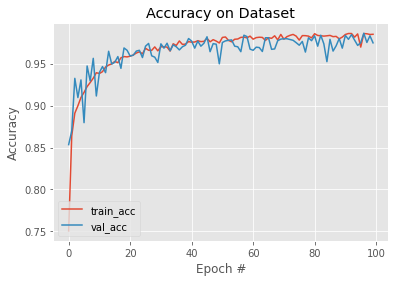

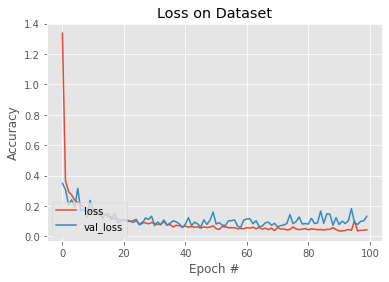

In [ ]:
import matplotlib.pyplot as plt

N = 100
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, N), H.history["accuracy"], label="train_acc")
plt.plot(np.arange(0, N), H.history["val_accuracy"], label="val_acc")
plt.title("Accuracy on Dataset")
plt.xlabel("Epoch #")
plt.ylabel("Accuracy")
plt.legend(loc="lower left")

plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, N), H.history["loss"], label="loss")
plt.plot(np.arange(0, N), H.history["val_loss"], label="val_loss")
plt.title("Loss on Dataset")
plt.xlabel("Epoch #")
plt.ylabel("Accuracy")
plt.legend(loc="lower left")

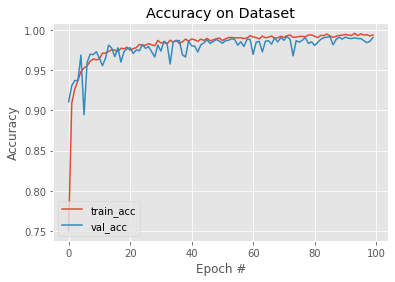

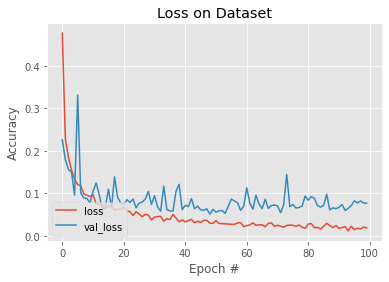

In [ ]:
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, N), H_scaled.history["accuracy"], label="train_acc")
plt.plot(np.arange(0, N), H_scaled.history["val_accuracy"], label="val_acc")
plt.title("Accuracy on Dataset")
plt.xlabel("Epoch #")
plt.ylabel("Accuracy")
plt.legend(loc="lower left")

plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, N), H_scaled.history["loss"], label="loss")
plt.plot(np.arange(0, N), H_scaled.history["val_loss"], label="val_loss")
plt.title("Loss on Dataset")
plt.xlabel("Epoch #")
plt.ylabel("Accuracy")
plt.legend(loc="lower left")